In [1]:
%%HTML
<h1 style="color:blue;"><u>Pytest (ipytest) tutorial by Jack Camier</u></h1>

## Inspiration for this talk is based on Brian Okken's book, "Python Testing with pytest"
### https://pragprog.com/book/bopytest/python-testing-with-pytest

## Brian Okken has a great podcast dedicated to testing with python called Test & Code:
### https://testandcode.com/

## Also, special thanks to Christopher Prohm who created a package to run pytest in Jupyter Notebooks called ipytest
### https://github.com/chmp/ipytest

## My talk will be running on a Jupyter Notebook using a Docker image that I created and custom kernel settings. It is found at
### https://github.com/jcamier/pytest-docker

In [2]:
%%HTML
<h1 style="color:red;">So why do a talk on testing and why pytest?</h1>

## Well if you have spent any significant time programming code that other people will use, if it is not well tested, it will break, be buggy, cause problems, you can lose clients, cost the company money due to rework, miss deadlines etc.

## Spending time writing good tests, will:
## 1) Help you feel more confident of the code you have written.
## 2) Be more stable code.  
## 3) A better ux (user experience).
## 4) Improve your programming logic and skills.
## 5) Help you sleep better at night.

In [3]:
%%HTML
<h1 style="color:green;">So let's jump into the talk, and run some code.</h1>

## First we need to import the ipytest package and its magic methods that allows us to use pytest in a Jupyter notebook

In [7]:
import ipytest
import ipytest.magics

## Quick question - is Python interpreted or compiled?

## Let's digress for a moment and talk about AST.
### *AST (Abstract Syntax Tree) - an abstract representation of code.

## 1a) Compiling process. Python parses the code into tokens. 
## These tokens are based on a set of rules for things that should be treated differently. For instance, the keyword "if" is a different token than a numeric value like "42".
## 1b) The raw list of tokens is transformed to build an Abstract Syntax Tree, AST.
## An AST is a collection nodes which are linked together based on the grammar of the Python language.
## Interpreting : This involves the actual execution of generated code objects within some context. 
https://www.mattlayman.com/blog/2018/decipher-python-ast/

https://leanpub.com/insidethepythonvirtualmachine/read

## Here is an example of a Python AST

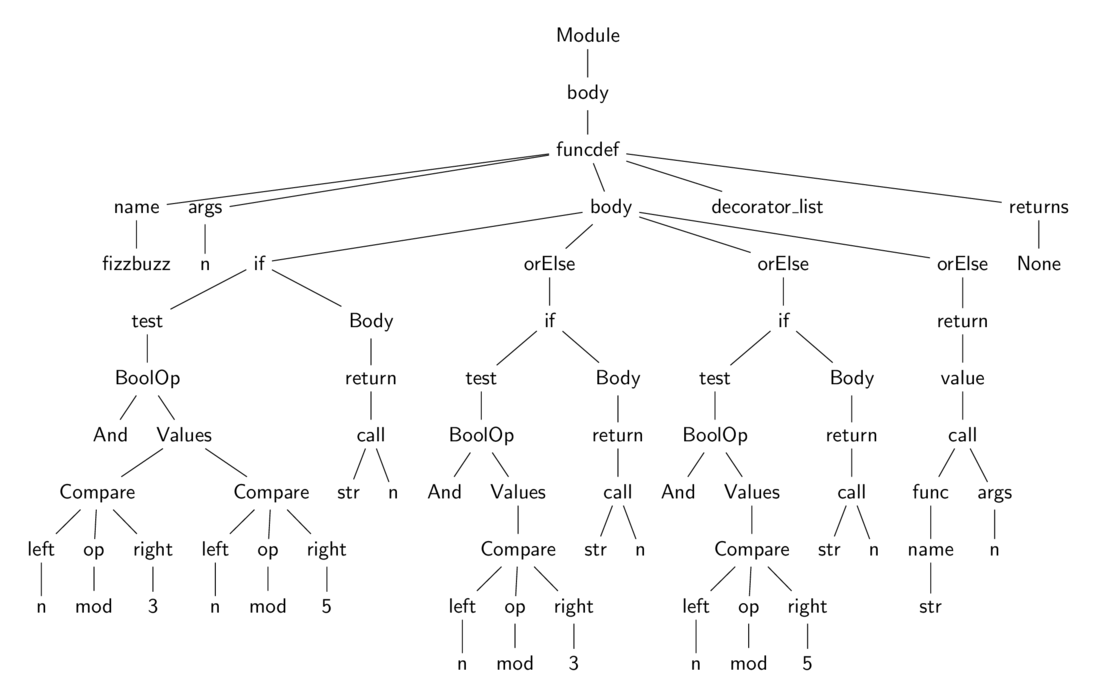

In [8]:
from IPython.display import Image
Image(filename='../images/ast_python_ex.png')

### Here is another example of a mathmatical AST

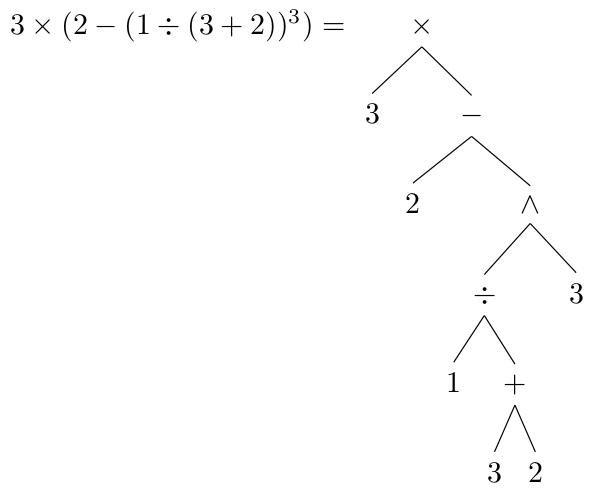

In [9]:
from IPython.display import Image
Image(filename='../images/math_ast_example.png')

### The next assignment is to enable ipython AST* transforms to rewrite asserts, defaults to False.

### A transformation is a function modifying this tree; basically it converts a previous AST into another one.
### Don't worry if you still don't understand fully the concept. Just remember that the below assignment helps when running assert methods for tests.

In [11]:
ipytest.config.rewrite_asserts = True  

## For ipytest, you need to mention the name of the workbook so, pytest knows where to run the tests

In [12]:
__file__ = "pytest_tutorial.ipynb"

## Use ipytest magic commands to run pytest in jupyter notebook. run_pytest[clean] - clears out all previous test run

In [13]:
%%run_pytest[clean]

UsageError: %%run_pytest[clean] is a cell magic, but the cell body is empty.


## Use ipytest magic command run_pytest passing arguments -qq to run pytest in current cell. Put a test function in this cell to see the results.

In [14]:
%%run_pytest -qq

def test_passing():
    assert (1, 2, 3) == (1, 2, 3)

.                                                                        [100%]


## You can see in this situation we had 100% test coverage with no issues.

In [15]:
%%run_pytest[clean]

UsageError: %%run_pytest[clean] is a cell magic, but the cell body is empty.


## Now let's run another test but with an assert statement that is clearly false and see what happens

In [16]:
%%run_pytest -qq

def test_passing():
    assert (1, 2, 3) == (1, 2, 4)

F                                                                        [100%]
=================================== FAILURES ===================================
_________________________________ test_passing _________________________________

    def test_passing():
>       assert (1, 2, 3) == (1, 2, 4)
E       assert (1, 2, 3) == (1, 2, 4)
E         At index 2 diff: 3 != 4
E         Full diff:
E         - (1, 2, 3)
E         ?        ^
E         + (1, 2, 4)
E         ?        ^

<ipython-input-16-8f6d4e7cc087>:3: AssertionError


## We get a test that has failed and ^ letting us know where our code is different! Very cool.

In [17]:
%%run_pytest[clean]

UsageError: %%run_pytest[clean] is a cell magic, but the cell body is empty.


## Now if we want to run ipytest for the whole notebook, call the ipytest.run method

In [17]:
ipytest.run()

============================= test session starts ==============================
platform darwin -- Python 3.6.5, pytest-4.1.1, py-1.7.0, pluggy-0.8.1
rootdir: /Users/jacquescamier/PycharmProjects/pytest_docker_tutorial/projects, inifile:
collected 1 item

pytest_tutorial.py F                                                     [100%]

=================================== FAILURES ===================================
_________________________________ test_passing _________________________________

    def test_passing():
>       assert (1, 2, 3) == (1, 2, 4)
E       assert (1, 2, 3) == (1, 2, 4)
E         At index 2 diff: 3 != 4
E         Use -v to get the full diff

<ipython-input-11-8f6d4e7cc087>:3: AssertionError
=========================== 1 failed in 0.09 seconds ===========================
